# Movie Review Sentiment Classifier (Mini NLP Project)

A simple NLP mini-project where I classify movie reviews as **positive (1)** or **negative (0)** using:
- Text cleaning
- TF-IDF features
- Logistic Regression (sklearn)


In [1]:
# 1. Load libraries

import pandas as pd
import numpy as np

print("Data Science environment ready")


Data Science environment ready


In [2]:
# 2. Create a small labeled dataset

data = [
    {"text": "The movie was amazing, I loved the story and acting!", "label": 1},
    {"text": "Terrible experience. The plot was boring and predictable.", "label": 0},
    {"text": "It was okay, not great but not bad either.", "label": 0},
    {"text": "Absolutely fantastic! Would definitely recommend to everyone.", "label": 1},
    {"text": "Waste of time. I wouldn't watch it again.", "label": 0},
    {"text": "Great visuals and soundtrack, I really enjoyed it!", "label": 1},
]

df = pd.DataFrame(data)

print("Shape:", df.shape)
df.head()


Shape: (6, 2)


,text,label
0,"The movie was amazing, I loved the story and a...",1
1,Terrible experience. The plot was boring and p...,0
2,"It was okay, not great but not bad either.",0
3,Absolutely fantastic! Would definitely recomme...,1
4,Waste of time. I wouldn't watch it again.,0


In [3]:
# 3. Text cleaning

import re

def clean_text(text: str) -> str:
    # 1. Lowercase
    text = text.lower()
    # 2. Remove punctuation and special characters
    text = re.sub(r"[^a-z0-9\s]", " ", text)
    # 3. Remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Apply cleaning
df["clean_text"] = df["text"].apply(clean_text)

df[["text", "clean_text", "label"]]


,text,clean_text,label
0,"The movie was amazing, I loved the story and a...",the movie was amazing i loved the story and ac...,1
1,Terrible experience. The plot was boring and p...,terrible experience the plot was boring and pr...,0
2,"It was okay, not great but not bad either.",it was okay not great but not bad either,0
3,Absolutely fantastic! Would definitely recomme...,absolutely fantastic would definitely recommen...,1
4,Waste of time. I wouldn't watch it again.,waste of time i wouldn t watch it again,0
5,"Great visuals and soundtrack, I really enjoyed...",great visuals and soundtrack i really enjoyed it,1


In [4]:
# 4. TF-IDF vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(df["clean_text"])

X.shape


D:\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(6, 25)

In [5]:
# 5. Prepare labels (y)

# label = 1 (positive review), 0 (negative review)
y = df["label"]
y


0    1
1    0
2    0
3    1
4    0
5    1
Name: label, dtype: int64

In [6]:
# 6. Train Logistic Regression model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

print("Model training complete ✅")


Model training complete ✅


In [7]:
# 7. Try predictions on new reviews

sample_clean = ["this movie was absolutely wonderful i loved every moment"]
sample_vec = vectorizer.transform(sample_clean)
prediction = model.predict(sample_vec)
print("Review 1 prediction:", prediction[0])  # 1 = positive, 0 = negative

sample_clean = ["worst movie ever total waste of time"]
sample_vec = vectorizer.transform(sample_clean)
prediction = model.predict(sample_vec)
print("Review 2 prediction:", prediction[0])  # expect 0


Review 1 prediction: 1
Review 2 prediction: 0


In [8]:
# 8. Check training accuracy

from sklearn.metrics import accuracy_score

preds = model.predict(X)
accuracy = accuracy_score(y, preds)

print("Training accuracy:", accuracy)


Training accuracy: 1.0


In [9]:
# 9. Look at most common words

from collections import Counter

all_words = " ".join(df["clean_text"]).split()
word_freq = Counter(all_words)

word_freq.most_common(10)


[('the', 3),
 ('was', 3),
 ('i', 3),
 ('and', 3),
 ('it', 3),
 ('not', 2),
 ('great', 2),
 ('movie', 1),
 ('amazing', 1),
 ('loved', 1)]

In [10]:
from collections import Counter

# Combine all cleaned text into one big string
all_words = " ".join(df["clean_text"]).split()

word_freq = Counter(all_words)

# Show top 10 most common words
word_freq.most_common(10)


[('the', 3),
 ('was', 3),
 ('i', 3),
 ('and', 3),
 ('it', 3),
 ('not', 2),
 ('great', 2),
 ('movie', 1),
 ('amazing', 1),
 ('loved', 1)]

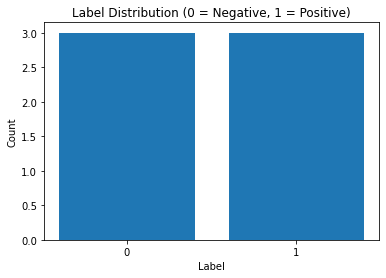

In [11]:
import matplotlib.pyplot as plt

counts = df["label"].value_counts().sort_index()
plt.bar(counts.index.astype(str), counts.values)
plt.title("Label Distribution (0 = Negative, 1 = Positive)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()
